<a href="https://colab.research.google.com/github/VAIBHAV2900/SummerSchool_Session3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/VAIBHAV2900/SummerSchool_Session3.git
% cd SummerSchool_Session3/

fatal: destination path 'SummerSchool_Session3' already exists and is not an empty directory.
/content/SummerSchool_Session3


### Unzipping the Dataset

In [2]:
import zipfile
with zipfile.ZipFile("Datasets.zip", 'r') as zip_ref:
    zip_ref.extractall("Titanic_Data/")

### Data preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train_data = pd.read_csv("/content/SummerSchool_Session3/Titanic_Data/train.csv")
test_data = pd.read_csv("/content/SummerSchool_Session3/Titanic_Data/test.csv")

In [5]:
train_data.columns, test_data.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

Text(0.5, 1.0, 'Missing values heatmap')

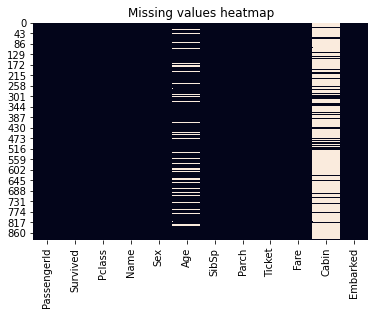

In [9]:
train_data.isnull().sum()
sns.heatmap(train_data.isnull(), cbar = False).set_title("Missing values heatmap")

In [10]:
# test_data.isnull().sum()
# sns.heatmap(test_data.isnull(), cbar = False).set_title("Missing values heatmap")

#### Age Issue

In [11]:
data_age = train_data.groupby(["Pclass","SibSp"])
data_age = data_age.median()
data_age

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [12]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [13]:
train_data["Age"]=train_data["Age"].fillna(fill_age(train_data,data_age))

In [14]:
## AGE values issue in Test data
test_age = test_data.groupby(["Pclass","SibSp"])
test_age = test_age.median()
test_age
test_data["Age"]=test_data["Age"].fillna(fill_age(test_data,test_age))

#### Cabin Issue

In [15]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
train_data["Cabin"]=train_data["Cabin"].fillna("U")
train_data["Cabin"]=train_data["Cabin"].map(lambda x: x[0])

In [17]:
## Cabin Values issue Test Data
test_data.Cabin.unique()
test_data["Cabin"]=test_data["Cabin"].fillna("U")
test_data["Cabin"]=test_data["Cabin"].map(lambda x: x[0])

In [18]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Embarked Issue
Since ‘Embarked’ only had two missing values and the largest number of commuters embarked from Southampton, the probability of boarding from Southampton is higher. So, we fill the missing values with Southampton. However, instead of manually putting in Southampton, we would find the mode of the Embarked column and substitute missing values with it.
The mode is the most frequently occurring element in a series.

In [19]:
train_data.Embarked.fillna(train_data.Embarked.mode()[0], inplace = True)

In [20]:
test_data.Embarked.fillna(test_data.Embarked.mode()[0], inplace = True)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train_data.Survived = train_data.Survived*100
train_data.Survived

0        0
1      100
2      100
3      100
4        0
      ... 
886      0
887    100
888      0
889    100
890      0
Name: Survived, Length: 891, dtype: int64

#### Fare missing value in test data

In [23]:
test_data.Fare.fillna(test_data.Fare.mode()[0], inplace = True)

# Visualization

In [24]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train_data['age_band'] = train_data['Age'].apply(age_band)

In [25]:
mkdir Images

mkdir: cannot create directory ‘Images’: File exists


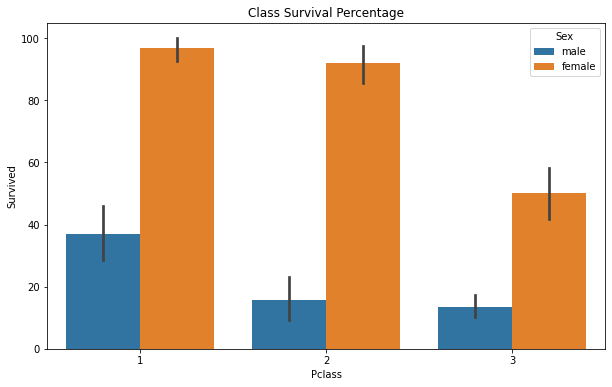

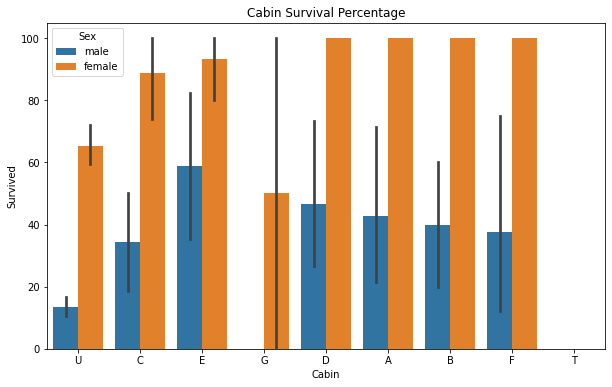

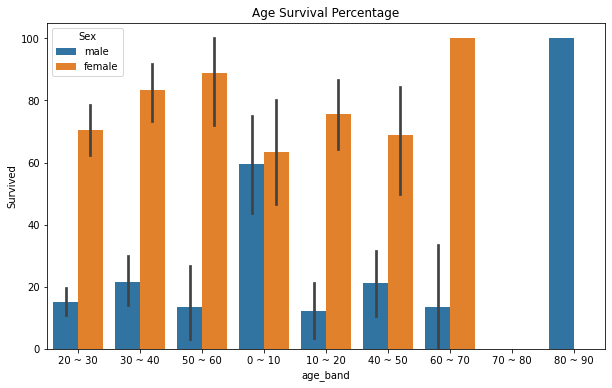

In [26]:
plt.figure(figsize=(10,6))
plt.title('Class Survival Percentage')
sns.barplot(
            y='Survived', 
            x='Pclass', 
            hue='Sex',
            data=train_data);
plt.savefig("Images/Class_Survival.png")


plt.figure(figsize=(10,6))
plt.title('Cabin Survival Percentage')
sns.barplot(
            x='Cabin', 
            y='Survived', 
            hue='Sex',
            data=train_data);
plt.savefig("Images/Cabin_Survival.png")


plt.figure(figsize=(10,6))
plt.title('Age Survival Percentage')
sns.barplot(
            x='age_band', 
            y='Survived', 
            hue='Sex',
            data=train_data);
plt.savefig("Images/Age_Survival.png")




In [27]:
from zipfile import ZipFile
with ZipFile('Visualization_Images.zip', 'w') as zipObj2:
   # Add multiple files to the zip
   zipObj2.write('Images/Class_Survival.png')
   zipObj2.write('Images/Cabin_Survival.png')
   zipObj2.write('Images/Age_Survival.png')

In [28]:
# plt.title('Family Survival Percentage')
# plt.xlabel('Family')
# sns.barplot(
#             x=train_data.SibSp + train_data.Parch, 
#             y='Survived', 
#             # hue='Sex',
#             data=train_data);
# # plt.savefig("Family_Survival.png")

In [29]:
# plt.title('Age distribution')
# plt.hist(train_data.Age, bins=20);

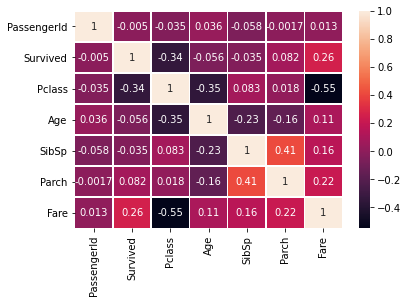

In [30]:
sns.heatmap(train_data.corr(),annot=True,linewidth=0.5)

In [31]:
#####################  Saving Visualization images pending

In [32]:
# for i in range(8):
#   plt.figure()
#   sns.boxplot(x= y_train, y= x_train[x_train.columns[i]])
#   plt.show

# Training

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  age_band     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [34]:
## Mapping non float values to float

gender_map = {'male' : 0, 'female' : 1}
cabin_map = { 'U':0, 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
embarked_map = {'S' : 0, 'C' : 1, 'Q':2}
train_data['Sex'] = train_data['Sex'].map(gender_map)
train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
train_data['Embarked'] = train_data['Embarked'].map(embarked_map)

In [35]:
## drop unecessary columns

x_train = train_data.drop(columns= ['Name','Ticket','age_band','Survived','PassengerId']).to_numpy()
y_train = (train_data.Survived/100).to_numpy()


In [36]:
len(x_train),len(y_train)

(891, 891)

In [37]:
# Splitting training data into train and val data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_TRAIN,X_VAL,Y_TRAIN,Y_VAL = train_test_split(x_train,y_train,test_size=0.1,random_state = 32)

In [38]:
# Initialize base_model SVM classifier
# rng = np.random.RandomState(0)
base_model = SVC()
base_model.fit(X_TRAIN,Y_TRAIN)

print("Acc on training data:", base_model.score(X_TRAIN,Y_TRAIN))
print("Acc on val data:", base_model.score(X_VAL,Y_VAL))

Acc on training data: 0.6766541822721598
Acc on val data: 0.7333333333333333


##### Grid Search application

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid_linear = [
  {'C': [0.01,0.1,1, 10, 100], 'kernel': ['linear']},
  # {'C': [0.01,0.1,1, 10, 100, 1000,10000], 'gamma': [10,1,0.1,0.01, 0.001,0.0001], 'kernel': ['rbf']},
 ]

In [41]:
gs_linear = GridSearchCV(estimator=base_model, 
                         param_grid=param_grid_linear,
                         verbose = 3,
                         error_score=0)

gs_linear.fit(X_TRAIN,Y_TRAIN)
print("Acc on training data:", gs_linear.score(X_TRAIN,Y_TRAIN))
print("Acc on val data:", gs_linear.score(X_VAL,Y_VAL))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.745, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.688, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.738, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.731, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.752, total=   0.1s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.781, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.800, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.750, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.781, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.752, total=   0.7s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.794, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.800, total=   1.1s
[CV] C=1, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.8min finished


Acc on training data: 0.784019975031211
Acc on val data: 0.8333333333333334


In [42]:
gs_linear.best_params_,gs_linear.best_score_

({'C': 100, 'kernel': 'linear'}, 0.7778260869565218)

In [43]:
gs_linear.cv_results_,[gs_linear.best_index_]
# ['params'],[gs_linear.best_index_]

({'mean_fit_time': array([1.28598690e-02, 8.18987370e-02, 2.74793067e+00, 7.94936609e+00,
         4.64310464e+01]),
  'mean_score_time': array([0.00104709, 0.00088038, 0.00090361, 0.0010498 , 0.00091276]),
  'mean_test_score': array([0.73031832, 0.77281056, 0.77531056, 0.77406056, 0.77782609]),
  'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear', 'linear'],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C': 0.01, 'kernel': 'linear'},
   {'C': 0.1, 'kernel': 'linear'},
   {'C': 1, 'kernel': 'linear'},
   {'C': 10, 'kernel': 'linear'},
   {'C': 100, 'kernel': 'linear'}],
  'rank_test_score': array([5, 4, 2, 3, 1], dtype=int32),
  'split0_test_score': array([0.74534161, 0.7515528 , 0.7515528 , 0.7515528 , 0.73913043]),
  '

In [44]:
# Check results for SVM-Linear for best parameters
best_linear_model = SVC(kernel= gs_linear.best_params_['kernel'],C=gs_linear.best_params_['C'])
best_linear_model.fit(X_TRAIN,Y_TRAIN)

print("Acc on training data:", best_linear_model.score(X_TRAIN,Y_TRAIN))
print("Acc on val data:", best_linear_model.score(X_VAL,Y_VAL))
# model.predict(x_test).sum()/len(x_test)

Acc on training data: 0.784019975031211
Acc on val data: 0.8333333333333334


In [45]:
param_grid_rbf = [
  # {'C': [1, 10, ], 'kernel': ['linear']},
  {'C': [0.01,0.1,1, 10, 100, 1000,10000], 'gamma': [10,1,0.1,0.01, 0.001,0.0001], 'kernel': ['rbf']},
 ]
# scores = ['precision', 'recall']

In [46]:
gs_rbf = GridSearchCV(estimator=SVC(), 
                      param_grid=param_grid_rbf,
                      verbose = 3,
                      # scoring='%s_macro' % score,
                      error_score=0)
gs_rbf.fit(X_TRAIN,Y_TRAIN)
print("Acc on training data:", gs_rbf.score(X_TRAIN,Y_TRAIN))
print("Acc on val data:", gs_rbf.score(X_VAL,Y_VAL))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.602, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.602, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.602, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.602, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   16.0s finished


In [47]:
gs_rbf.best_params_,gs_rbf.best_score_

({'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, 0.7977795031055901)

In [48]:
# Check results for SVM-RBF for best parameters

best_rbf_model = SVC(kernel=gs_rbf.best_params_['kernel'], C=gs_rbf.best_params_['C'], gamma= gs_rbf.best_params_['gamma'])
best_rbf_model.fit(X_TRAIN,Y_TRAIN)

print("Acc on training data:", best_rbf_model.score(X_TRAIN,Y_TRAIN))
print("Acc on val data:", best_rbf_model.score(X_VAL,Y_VAL))
# model.predict(x_test).sum()/len(x_test)

Acc on training data: 0.8714107365792759
Acc on val data: 0.8222222222222222


### Test Data

In [49]:
gender_map = {'male' : 0, 'female' : 1}
cabin_map = { 'U':0, 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
embarked_map = {'S' : 0, 'C' : 1, 'Q':2}
test_data['Sex'] = test_data['Sex'].map(gender_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)
test_data['Embarked'] = test_data['Embarked'].map(embarked_map)

x_test = test_data.drop(columns= ['Name','Ticket','PassengerId']).to_numpy()

In [51]:
SVM_linear = pd.DataFrame(best_linear_model.predict(x_test))
SVM_linear.to_csv('Predictions/SVM_linear.csv', index = False)

In [52]:
SVM_rbf = pd.DataFrame(best_rbf_model.predict(x_test))
SVM_rbf.to_csv('Predictions/SVM_rbf.csv', index = False)

In [53]:
(best_linear_model.predict(x_test) - best_rbf_model.predict(x_test)).sum()

-28.0

In [54]:
with ZipFile('Prediction.zip', 'w') as zipObj2:
   # Add multiple files to the zip
   zipObj2.write('Predictions/SVM_linear.csv')
   zipObj2.write('Predictions/SVM_rbf.csv')